In [1]:
# when you change the code of .py document in the ecolab package, you have to restart the kernel of jupyter notebook and 
# run the below import code again to make sure the newest change involved.

import numpy as np
import numba
from ecolab import run_ecolab
from ecolab.environment import Environment
from ecolab.agents import Rabbit, RHD_Status
import warnings
warnings.filterwarnings("ignore")


import matplotlib
import matplotlib.pyplot as plt




In [10]:
# create the environment
env = Environment(shape = [20,20])

#create agents(infants and adults)
Ninfants = 10
Nadults = 400
Infected_Adults = 100
agents = []

for i in range(Ninfants):
    infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
    agents.append(infant)
for i in range(Nadults):
    adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
    agents.append(adult)
for i in range(Infected_Adults):
    infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)   
    agents.append(infected_adult)


In [ ]:
record, sus, infected, immune, total, infant = run_ecolab(env, agents, 365)

iteration: 0
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit 

one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
iteration: 7
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
iteration: 8
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected
one rabbbit get infected

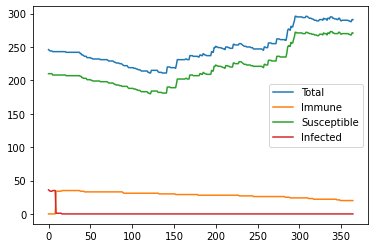

In [4]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(total, label='Total')
ax.plot(immune, label='Immune')
ax.plot(sus, label='Susceptible')
#ax.plot(infant, label='Infants')
ax.plot(infected, label='Infected')
#ax.plot(male, label='Male')
#ax.plot(female, label='Female')


leg = ax.legend();

In [5]:
#def draw_animation(fig,record,fps=20,saveto=None):
    """
    Draw the animation for the content of record. This doesn't use the draw
    functions of the classes.
    - fig figure to draw to
    - record = the data to draw
    - fps = frames per second
    - saveto = where to save it to
    """
    #rc('animation', html='html5')
    if len(record)==0: return None

    im = plt.imshow(np.zeros_like(record[0]['infected agents']), interpolation='none', aspect='auto', vmin=0, vmax=3, cmap='gray')
    ax = plt.gca()

    #foxesplot = ax.plot(np.zeros(1),np.zeros(1),'bo',markersize=10)
    rabbitsplot = ax.plot(np.zeros(1),np.zeros(1),'yx',markersize=10,mew=3)

    def animate_func(i):
            im.set_array(record[i]['infected agents'])
            ags = record[i]['total']
            if len(ags)==0:
                rabbitsplot[0].set_data([],[])
                #foxesplot[0].set_data([],[])
                return
            coords = ags[ags[:,-1].astype(bool),0:2]
            rabbitsplot[0].set_data(coords[:,1],coords[:,0])
            #coords = ags[~ags[:,-1].astype(bool),0:2]
            #foxesplot[0].set_data(coords[:,1],coords[:,0])
            #return [im]#,rabbits,foxes]

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = len(record),
                                   interval = 1000 / fps, repeat=False # in ms
                                   )
    if saveto is not None: anim.save(saveto, fps=fps, extra_args=['-vcodec', 'libx264']) 
    from IPython.display import HTML
    return HTML(anim.to_jshtml())

IndentationError: unexpected indent (244214660.py, line 2)

In [ ]:
#%matplotlib notebook 
#fig1 = plt.figure( figsize=(8,8) )
#draw_animation(fig1, record[::5],5,saveto='test_anim.mp4') #draw every 5th frame